## About the dataset - IMDB Movies

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using classification.

### Import the basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import regex as re
#below code is for not showing up any warnings that might appear for the ongoing improvements in functions
import warnings
warnings.filterwarnings('ignore')

### Import the dataset in the form of dataframe

I have downloaded a dataset on movie reviews from Kaggle. Movie dataset is the most commonly used dataset for sentiment classification learning.

In [3]:
#Reading the csv file into the dataframe
df = pd.read_csv(r'G:\Imarticus Learning\Projects\NLP\IMDB Dataset.csv')

In [4]:
#Let's look into the records
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.sentiment.replace({'positive':1, 'negative':0}, inplace = True)

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Now, the sentiments marked as 1 are positive and those that are 0 are negative. This is how it has been labeled and you will get this information when you download it from the site.

In [7]:
#checking number of rows and columns 
df.shape

(50000, 2)

In [8]:
#Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


The dataset does not contain Null data. Good for us! Let’s move on to see the number of positive and negative feedbacks.

In [9]:
df.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

There are 25000 negative comments and 25000 positive comments. Since the presence of both types of feedbac same, we will not be performing sampling in the dataset. However, we might get more accuracy if we do perform sampling. Let’s plot the sentiment numbers.

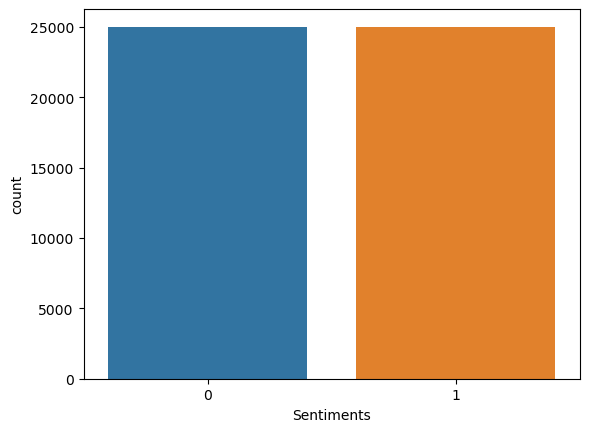

In [10]:
sns.countplot(x = 'sentiment', data = df)
plt.xlabel('Sentiments')

plt.show()

### Text Processing

When we are using text data, we do not have features as we would see in structured tabular data. Thus, we need some measures to get the features out of the text data with us. What if we can take each word from a sentence and get some kind of measure by which we can find out if the word exists in another sentence or not and also its importance? This is certainly possible by the process called the Bag Of Word Model. That is, each sentence in our movie review dataset is treated as a bag of words, thus each sentence is called a document. All the documents together make up a corpus.

We will first create a dictionary of all the unique words used in the corpus (which means all the documents or reviews present in the dataset). We do not consider grammar like the, an, is, etc., while making the word count, since this does not hold any significant importance in understanding the text context. Then we will convert all the documents (individual reviews) into vectors which will represent the presence of words from our dictionary in the particular documents.
There are three ways to identify the importance of words in the BoW model -

1.Count Vector Model


2.Term Frequency Vector Model — tf

3.Term Frequency-Inverse Document Frequency Model — tf-idf

The Count Vector Model will count the number of appearances of the words in a full sentence. Its better to understand visually, so suppose we have the below statements -
review1 = ‘Movie was very very good’
review2 = ‘Movie was disappointing’
In the count vector model, the reviews will show up as such -

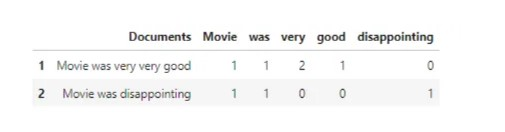

In [11]:
from IPython.display import Image
Image(filename=r'C:\Users\DELL\Downloads\NLP.jpg', width=600, height=100)

Term Frequency Model — In this, the frequency of each word is calculated in each document (or sentence) with respect to the total number of words observed in the full document. It is given by -
TF = Number of occurrences of a word in an ith document / Total number of words in the ith document

Term Frequency-Inverse Document Frequency Model — TFIDF measures the importance of the word in a particular sentence. The importance of a word in a sentence is directly proportional to its number of presence in the document and is inversely proportional to the frequency of the same word in full corpus. It is given by -
TF-IDF = TF x ln (1+N/Ni), where N is the total number of documents in the corpus and Ni is the document which is containing the word i.

## Count Vectorizer — Bag Of Word Model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#initializing the CountVectorizer
count_vector = CountVectorizer()

#creating dictionary of words from the corpus
features = count_vector.fit(df['review'])

#Let's see the feature names extracted by the CountVectorizer
feature_names = features.get_feature_names_out()
feature_names

array(['00', '000', '00000000000', ..., 'żmijewski', 'יגאל', 'כרמון'],
      dtype=object)

In [13]:
print('Total Number of features extracted are - ',len(feature_names))

Total Number of features extracted are -  101895


This represents the presence of 101895 unique features in our dataset. This is because we have not cleaned the texts out of unwanted texts.

In [14]:
#Let's randomly pickup 10 feature names out of it
random.sample(set(feature_names), 10)

['sarlo',
 'ep',
 'timesplitters',
 'chirin',
 'sanctify',
 'desensitised',
 'chortles',
 'berger',
 'levens',
 'intently']

As we can see these are the feature names and not the vector form of it. We have to convert the features into their vector form.

In [15]:
feature_vector = count_vector.transform(df['review'])
feature_vector.shape

(50000, 101895)

From the shape, we can see that all the 50000 documents are represented by 101895 features (which are unique words). For the words which are present in the document, the corresponding feature will carry the number of times that word has appeared in the document. If the word is not present then the feature gets 0 value. As a result we turn up getting a lot of 0s in the vector data. In order to know the number of 0s present in the feature vector, do as below —

In [16]:
feature_vector.getnnz()

6826529

In [17]:
# To get the non-zero value density in the document
feature_vector.getnnz()/(feature_vector.shape[0]*feature_vector.shape[1])

0.0013399144217086216

There are so less non zero values in our feature vector! Most of it are zero! You can visualize your sparse matrix as below —

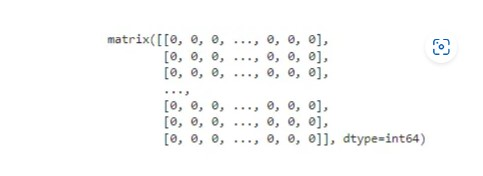

In [18]:
from IPython.display import Image
Image(filename=r'C:\Users\DELL\Downloads\Matrix.jpg', width=600, height=100)

### Stopwords Removal

Need to remove the stop words from the sentences since they do not hold any essential meaning. Stop words are words like the, an, was, is, etc. This will reduce the number of features. We will import the stopwords from nltk library -

In [19]:
from nltk.corpus import stopwords

In [20]:
#since the reviews are in english, stopwords will be in english that we need to set as below -
all_stopwords = set(stopwords.words('english'))

In [21]:
#this is how stop words looks like - 
list(all_stopwords)[:10]

['same',
 'don',
 'were',
 "you're",
 'couldn',
 'any',
 'their',
 'should',
 'am',
 "you'll"]

Now we will again start from the beginning that is we will again call the countvectorizer but this time with an additional parameter of stop_words which will stop the stopwords from appearing in the count vector —

In [22]:
count_vector2 = CountVectorizer(stop_words=list(all_stopwords))
feature_names2 = count_vector2.fit(df['review'])

feature_vector2 = count_vector2.transform(df['review'])
feature_vector2.shape

(50000, 101750)

Previously, the number of features were 101895 and now its 101750. The is a slight reduction. We need to reduce more.

If we look into the features then we will observe that there are many non english words and numbers which is polluting the dataset. Let’s clear them up

In [28]:
#we will use the regex module to go through each document and look for the non english characters and will replace them with a space in our document
for word in df.review[:][:10]:
    review = re.sub('[^a-zA-Z]',' ',word)

Now its a good idea to turn all the words in the review sentence in lowercase and then remove the stopwords since vectorizer tends to create two vectors for say hello and HELLO due to differences in cases.

In [29]:
sentences = []
for word in df.review:
    review = re.sub('[^a-zA-Z]',' ',word)
    review = review.lower()
    sentences.append(review)

sentences are now cleaned form of df[‘review’]. Let’s apply counvectorizer after removing the stop words from sentences and observe the difference in features.

In [30]:
count_vector3 = CountVectorizer(stop_words=list(all_stopwords))
feature_names3 = count_vector3.fit(sentences)
feature_vector3 = count_vector3.transform(sentences)
feature_vector3.shape

(50000, 99255)

Features has reduced from 101750 to 99255. Not a big difference! Let’s see the feature along with its count once —

### Stemming and Lemmatization

Stemming is the process of reducing the words to their root form. Stemming chops the end portion of the word and brings it back to its root form since vectorizer treats similar meaning words but differently written as two different features. For example, love, loving, and loved all have similar meanings in different forms. Stemmer will chop off each word to its root form of love. This will lead to the creation of a single feature instead of 3. One problem with stemming is that the words created after stemming are not a part of the vocabulary and stemming also cannot convert the words considering their morphological meaning. For example, both women and woman relate to the same thing but Stemmer cannot understand that. However, lemmatization takes the morphological analysis of the words into consideration. It uses the dictionary to convert the words into its root word. For example, lemmatization can understand woman and women belong to the same entity and will reduce these to woman.

Let’s work with stemmer first. There are two algorithms for it — PorterStemmer and LancasterStemmer

In [31]:
from nltk.stem.porter import PorterStemmer
#object for porterstemmer is needed
ps = PorterStemmer()

# we have sentences turned into lowercase now we will stem individual words and then look into if its a stop word or not.
# we will create a list removing all the stop words
sentences_stemmed = []
for reviews in sentences:
    reviews1 = [ps.stem(word) for word in reviews.split() if not word in all_stopwords]
    sentences_stemmed.append(' '.join(reviews1))

#Let's call the Countvectorizer process now 
count_vector4 = CountVectorizer() 
feature_names4 = count_vector4.fit(sentences_stemmed) 
feature_vector4 = count_vector4.transform(sentences_stemmed)

feature_vector4.shape


(50000, 68997)

Here we can see that Features has reduced from 99255 to 68997. Let’s now use Lemmatization. We will use WordNetLemmatizer algorithm —

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
sentences_lemma = [] 
for texts in sentences: 
     review1 = [lemma.lemmatize(word) for word in texts.split() if not word in all_stopwords] 
     sentences_lemma.append(' '.join(review1))

#Let's call the Countvectorizer process now 
count_vector5 = CountVectorizer() 
feature_names5 = count_vector5.fit(sentences_lemma) 
feature_vector5 = count_vector5.transform(sentences_lemma)

feature_vector5.shape

(50000, 89733)

Here, we will be using PorterStemmer for stemming. Maybe you can use Lemmatization instead of PorterStemmer to find out what difference in the result you get! Okay now let’s create a function that will do all these tasks we have seen so far and will give the final result of sentences -

In [35]:
def get_clean_text(df, col):
    sentence = []

    for word in df[col][:]:
        review = re.sub('[^a-zA-Z]',' ',word)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in all_stopwords]
        review = ' '.join(review)
        sentence.append(review)

    return sentence

df['clean_text'] = get_clean_text(df, 'review')

In [36]:
df = df.head(10000)

In [37]:
#Now we need to vectorize it. We will do it in the same way, that is using countvectorizer -
cv = CountVectorizer()
features = cv.fit_transform(df['clean_text'])

### Classification

Let’s split the dataset and now we will use classification to do the sentiment analysis. We are using Naive Bayes Classification here -

In [38]:
#splitting the dataset into train and test
x = features.toarray()
y = df['sentiment']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### Model training

We will build two types of Naive Bayes classifier and compare the accuracy. First is the GaussianNB -

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

### Model Validating

Our model is trained. Now lets do the prediction

In [40]:
y_pred = classifier.predict(x_test)

Okay! Let’s check for accuracy now -

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[746 250]
 [530 474]]


In [42]:
round(accuracy_score(y_test, y_pred), 3)

0.61

There are 530 False Negatives, which is not that good as a result! Accuracy of our model is quiet low. This maybe the result of some bizzare comments presence. Let’s check the training set accuracy to check for overfitting —

In [43]:
y_pred_train = classifier.predict(x_train)
round(accuracy_score(y_train, y_pred_train), 3)

0.895

Clearly, the model is way too overfitted. Now let’s apply another NB classification model before working around data -

<AxesSubplot:>

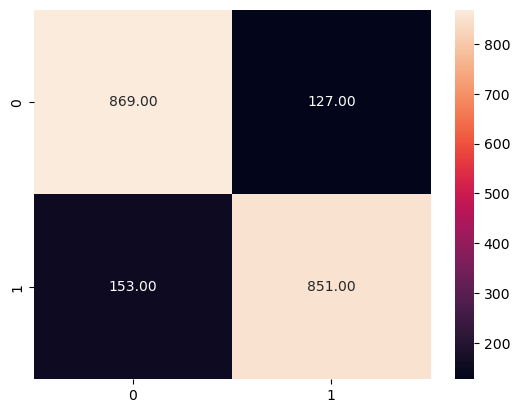

In [44]:
from sklearn.naive_bayes import BernoulliNB

classifier2 = BernoulliNB()
classifier2.fit(x_train, y_train)

y_pred2 = classifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, fmt='.2f')

Rows are showing the actual labels from the data and the Columns are showing the predicted labels. From this, we can see that there are 153 positive statements that are wrongly classified as negative which is False Negative. There are 127 negative statements that are classified as positives indicating false positives. This shows that BernaulliNB might be a better model for this dataset.

In [45]:
round(accuracy_score(y_test, y_pred2), 3)

0.86

Test Accuracy has also increased considerablyusing the model! Let’s check for overfitting -

In [46]:
y_pred_train2 = classifier2.predict(x_train)
round(accuracy_score(y_train, y_pred_train2), 3)

0.933

Still overfitting is there, though much reduced than before. Let’s look into the complete classification report -

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       996
           1       0.87      0.85      0.86      1004

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Now we can think of some way to increase the accuracy more. What can we do? Let’s try changing the BagOfWord model. We were using CountVectorizer till now, let’s use tf idf vectorizer and see the difference —

## TF-TDF Vectorizer — Bag Of Word Model

<AxesSubplot:>

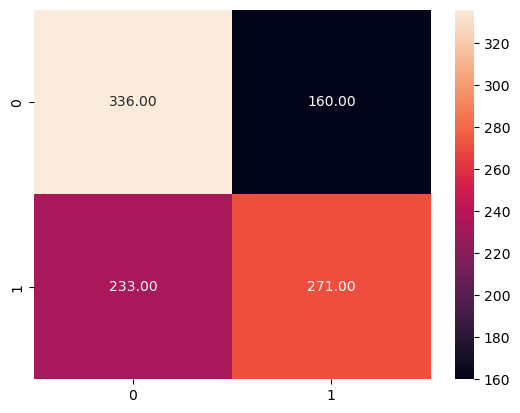

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
features = tfidf.fit_transform(df['clean_text'])
x1 = features.toarray()
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.10, random_state = 42)

#Let's use GaussianNB first
classifier = GaussianNB() 
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test) 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='.2f')

In [49]:
round(accuracy_score(y_test, y_pred), 3)

0.607

<AxesSubplot:>

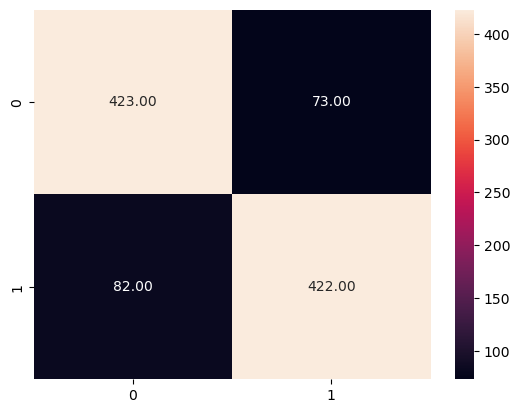

In [50]:
#Now using BernaulliNB
classifier2 = BernoulliNB()
classifier2.fit(x_train, y_train)

y_pred2 = classifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, fmt='.2f')

In [51]:
round(accuracy_score(y_test, y_pred2), 3)

0.845

In [52]:
y_pred_train2 = classifier2.predict(x_train)
round(accuracy_score(y_train, y_pred_train2), 3)

0.932

In [53]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       496
           1       0.85      0.84      0.84       504

    accuracy                           0.84      1000
   macro avg       0.85      0.85      0.84      1000
weighted avg       0.85      0.84      0.84      1000



Thus we see that the BernoulliNB model is best to use and not the Gaussian for this dataset. Also, model performance is not significantly changed with the change in the type of vectorization. Hence we will use some other form of word vectorization now other than BogOfWords and see the change.

BoW model ignores the sentence structure or the word sequences in a sentence. n-grams model takes care of that. The meaning of the words may change depending on the words it is preceding or succeeding. For example, in the sentence ‘I am not happy’ this not happy should be considered as one unit instead of two separate words. n-gram takes care of this fact and is a contiguous sequence of n words. When two consecutive words are treated as one unit, it is called bigram, for three consecutive words it is called trigram, and so on. Let’s use n-grams now —

## N-Grams — Bag Of Word Model

<AxesSubplot:>

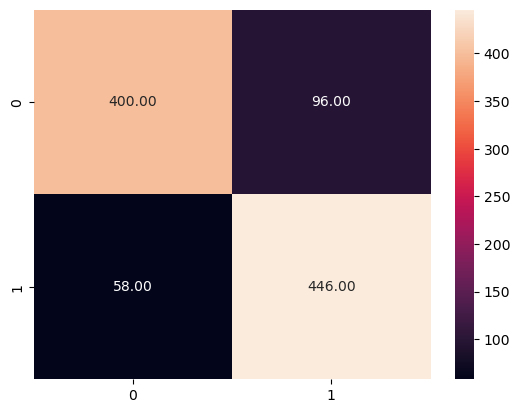

In [54]:
tfidf2 = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
feature2 = tfidf2.fit_transform(df['clean_text'])

x = feature2.toarray()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

#using bernaulli since its performing best 
#Now using BernaulliNB 

classifier = BernoulliNB() 
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test) 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, fmt='.2f')

On the way you can see the number of reductions in False Positives and False Negatives

In [55]:
accuracy_score(y_test, y_pred)

0.846

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       496
           1       0.82      0.88      0.85       504

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



After changing the vectorizer type and using Bernaulli, we are able to achieve 84.6% accuracy. We jumped from 61% accuracy to 82.4% accuracy. There might be a bit of overfitting. So let’s try to clean up the dataset first -

In [57]:
#removing the words of 1 letter or 0 letter 
sentences_clean = [] 
for listed in df['clean_text'].str.split(' '): 
     review = [word for word in listed if len(word) != 1 and len(word) != 0] 
     review = ' '.join(review) 
     sentences_clean.append(review)

#removing all same letters from string 
def allCharactersSame(s) : 
     n = len(s) 
     for i in range(1, n) : 
         if s[i] != s[0] : 
             return False
         return True 

cleaned = []
for sentences in sentences_clean: 
     word_list = [] 
     for word in sentences.split(' '): 
         if allCharactersSame(word): 
             pass 
         else: 
             word_list.append(word) 
     word_list = ' '.join(word_list) 
     cleaned.append(word_list)

df['clean_text'] = cleaned
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


Now let’s perform vectorizer and classifiers —

<AxesSubplot:>

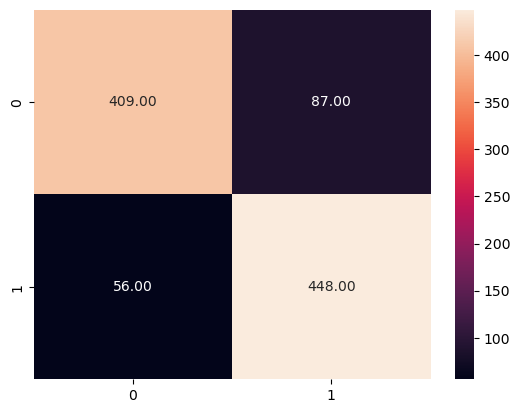

In [58]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
feature = tfidf.fit_transform(df['clean_text'])
x = feature.toarray()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

#using bernaulli since its performing best
#Now using BernaulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='.2f')

In [59]:
accuracy_score(y_test, y_pred)

0.857

In [60]:
y_pred1 = classifier.predict(x_train) 
#training accuracy calculation
accuracy_score(y_train, y_pred1)

0.8976666666666666

In [61]:
#Lets try running on Multinomial on Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
pred_mnb = nb.predict(x_test)
accuracy_score(y_test, pred_mnb)

0.854

### Conclusion

As we can see after trying out all the methods, we came up with 85.7% accuracy and the accuracy out of training data is 89.7%. This shows there is a little bit of overfitting is still there in the model. We can try GridSearchCV to get the best parameter for the model. But I will continue with the accuracy of 85.7% which is quiet good looking into the training accuracy we are getting.